# Datan analysointi K2021 - Tehtävät kerta 7

**Opiskelijan nimi:**

Harjoituskerran 7 tehtävistä palautetaan Moodleen tiedosto muodossa **harjoitus7_etunimi_sukunimi.ipynb**. Jokaiseen vastattuun tehtävään tulee ajaa niiden ratkaisut näkyville. Vain ajetut ratkaisut voidaan arvioida. Tehtäväsi arvioidaan pistein:

* 1,0 p. Vastaus on täysin oikein.
* 0,5 p. Vastaus on osittain oikein.
* 0 p. Vastaus on väärin.

**Tehtävissä ei tule käyttää silmukkarakenteita.** Sen sijaan tämän harjoituksen tehtävät kirjoitetaan ilman funktiorakennetta (skripti muodossa).


In [224]:
# Marjo Nopola AA9074

## 1. Lineaarinen regressio

Eräs kappale on tasaisesti kiihtyvässä liikkeessä ja siitä on mitattu aika liikkeelle lähdöstä sekunteina, paikka yksiköissä $m$, nopeus yksiköissä $m/s$ ja kiihtyvyys yksiköissä $m/s^2$. Tee alla olevan esimerkkikuvan kaltainen kuva, jossa
* olet käsitellyt datan lukemalla sen DataFrameen [url:sta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Motion.csv),
* jos datassa on NaN arvoja olet sijoittanut niiden paikalle arvon 0,
* vaaka-akselilla on esitetty datasta aika 'Time t / s' ja pystyakselilla on esitetty nopeus 'Velocity v / m/s',
* mitatut arvot ('Time t / s','Velocity v / m/s') näkyvät sinisellä värillä 'x' merkillä,
* mitattuihin arvoihin on sovitettu pienimmän neliösumman menetelmällä suora,
* suoran yhtälö (Fitted) ja mitatut arvot (Measured) on esitetty kuvan selitteessä ja suoran yhtälön kertoimet on esitetty neljän desimaalin tarkkuudella,
* mitattujen aika 'Time t / s' ja nopeus 'Velocity v / m/s' arvoista on laskettu korrelaatiokerroin ja kovarianssi,
* kovarianssi (Covariance) ja korrelaatiokerroin (Correlation) on pyöristetty kolmen desimaalin tarkkuuteen ja esitetty kuvassa kuvaan lisätyn tekstin avulla.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/tehtava1.svg" width="450"/>

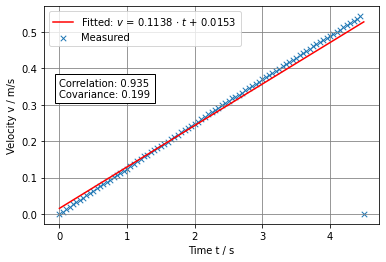

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
url = 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Motion.csv'
df = pd.read_csv(url, sep=';', decimal=',')
df.fillna(0, inplace=True)

malli = LinearRegression()
x = df['Time t / s'].to_frame()
y = df['Velocity v / m/s']
malli.fit(x, y)
kulmakerroin = malli.coef_
vakiotermi = malli.intercept_

kovarianssi = df['Time t / s'].cov(df['Velocity v / m/s'])
korrelaatiokerroin = df['Time t / s'].corr(df['Velocity v / m/s'])

kulmak = '{:.4f}'.format(kulmakerroin[0])
vakiot = '{:.4f}'.format(vakiotermi)
kovar = '{:.3f}'.format(kovarianssi)
korr = '{:.3f}'.format(korrelaatiokerroin)

yfit = malli.predict(x)

plt.scatter(x, y, label='Measured', marker='x', linewidths=1, s=30)
plt.plot(x, yfit, label='Fitted: $v$ = ' + kulmak + ' $\cdot$ $t$ + ' + vakiot, color='red')
plt.legend()
plt.grid(color='grey')
plt.xlabel('Time t / s')
plt.ylabel('Velocity v / m/s')
plt.text(0.0, 0.32, s='Correlation: '+ korr + '\nCovariance: ' + kovar, bbox=dict(facecolor='white'))
plt.show()



## 2. Muuttujien muunnokset ja lineaarinen regressio

Eräs kappale on tasaisesti kiihtyvässä liikkeessä ja siitä on mitattu aika liikkeelle lähdöstä sekunteina, paikka yksiköissä $m$, nopeus yksiköissä $m/s$ ja kiihtyvyys yksiköissä $m/s^2$. Tee alla olevan esimerkkikuvan kaltainen kuva, jossa
* olet käsitellyt datan lukemalla sen DataFrameen [url:sta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Motion.csv),
* jos datassa on NaN arvoja olet sijoittanut niiden paikalle arvon 0,
* vaaka-akselilla on esitetty datasta aika 'Time t / s' ja pystyakselilla on esitetty kappaleen paikka 'Path s_A1 / m',
* mitatut arvot ('Time t / s','Path s_A1 / m') näkyvät sinisellä värillä 'x' merkillä,
* mitattuihin arvoihin on sovitettu muuttujien muunnoksen ja lineaarisen regression avulla toisen asteen yhtälö,
* toisen asteen yhtälö (Fitted) ja mitatut arvot (Measured) on esitetty kuvan selitteessä ja toisen asteen yhtälön kertoimet on esitetty neljän desimaalin tarkkuudella.

Muuttujien muunnoksessa voit tehdä muunnoksen 
$$d=\sqrt{s},$$
missä $s$ on kappaleen paikka metreinä ja $d$ on uusi muuttuja, jonka avulla voidaan lineaarisen regression avulla laskea toisen asteen yhtälön termit.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/tehtava2.svg" width="450"/>

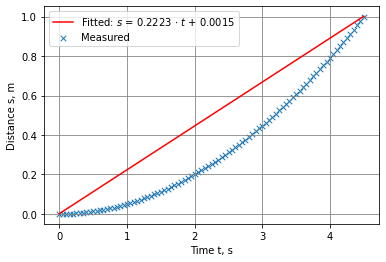

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
url = 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Motion.csv'
df = pd.read_csv(url, sep=';', decimal=',')
df.fillna(0, inplace=True)

df['Path s_A1 / m'] = df['Path s_A1 / m'].clip(lower=0)
df['d'] = np.sqrt(df['Path s_A1 / m'])

#print(df.head())

malli = LinearRegression()
x = df['Time t / s'].to_frame()
y = df['d']
malli.fit(x, y)
kulmakerroin = malli.coef_
vakiotermi = malli.intercept_
kulmak = '{:.4f}'.format(kulmakerroin[0])
vakiot = '{:.4f}'.format(vakiotermi)
#print(kulmak)
#print(vakiot)

yfit = malli.predict(x)
y = y**2

plt.scatter(x, y, label='Measured', marker='x', linewidths=1, s=30)
plt.plot(x, yfit, label='Fitted: $s$ = ' + kulmak + ' $\cdot$ $t$ + ' + vakiot, color='red')
plt.legend()
plt.grid(color='grey')
plt.xlabel('Time t, s')
plt.ylabel('Distance s, m')

plt.show()



## 3. Muuttujien väliset riippuvuudet

Tehtävissä 3., 4. ja 5. käsitellään [pankkilainadataa](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv), joka sisältää seuraavat sarakkeet:

| Column name        | Description                                                                 |
| :--- | :--- |
| ID                 | Customer ID                                                                 |
| Age                | Customer's age in completed years                                           |
| Experience         | #years of professional experience                                           |
| Income             | Annual income of the customer (\$000)                                        |
| ZIPCode            | Home Address ZIP code.                                                      |
| Family             | Family size of the customer                                                 |
| CCAvg              | Avg. spending on credit cards per month (\$000)                              |
| Education          | Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional        |
| Mortgage           | Value of house mortgage if any. (\$000)                                      |
| Personal Loan      | Did this customer accept the personal loan offered in the last campaign?    |
| Securities Account | Does the customer have a securities account with the bank?                  |
| CD Account         | Does the customer have a certificate of deposit (CD) account with the bank? |
| Online             | Does the customer use internet banking facilities?                          |
| CreditCard         | Does the customer use a credit card issued by UniversalBank?                |

Edellä kuvatussa datassa esiintyy sarake **'Personal Loan'**, jossa asiakkaan lainatarjouksen hyväksymispäätöstä on merkitty arvolla 1 ja kieltäytymispäätöstä on merkitty arvolla 0.

Selvitä [datasta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv) seuraavat asiat:
* Kuinka paljon datassa on lainatarjouksen hyväksymis- ja kieltäytymispäätöksiä?
* Millä viidellä muuttujalla on suurin lineaarinen riippuvuus muuttujaan 'Personal Loan' verrattuna?
* Luettele kolme muuttujaparia, joilla on keskinäinen lineaarinen riippuvuus on suurinta.
* Esitä data valitsemallasi visualisointimenetelmällä, joka mielestäsi kuvaa parhaiten muuttujien välisiä lineaarisia riippuvuussuhteita.


Voit antaa vastauksesi hyvin dokumentoidun koodin muodossa.

0    4520
1     480
Name: Personal Loan, dtype: int64
Lainatarjouksen hyväksymispäätöksiä: 480 
Lainatarjouksen kieltäytymispäätöksiä: 4520


Viisi muuttujaa, joilla suurimmat lineaariset riippuvuudet muuttujaan 'Personal Loan' verrattuna:
Income       0.5025
CCAvg        0.3669
CD Account   0.3164
Mortgage     0.1421
Education    0.1367
dtype: float64


Korrelaatiokerroinmatriisi:
                        ID     Age  Experience  Income  ZIP Code  Family  \
ID                  1.0000 -0.0085     -0.0083 -0.0177    0.0134 -0.0168   
Age                -0.0085  1.0000      0.9942 -0.0553   -0.0292 -0.0464   
Experience         -0.0083  0.9942      1.0000 -0.0466   -0.0286 -0.0526   
Income             -0.0177 -0.0553     -0.0466  1.0000   -0.0164 -0.1575   
ZIP Code            0.0134 -0.0292     -0.0286 -0.0164    1.0000  0.0118   
Family             -0.0168 -0.0464     -0.0526 -0.1575    0.0118  1.0000   
CCAvg              -0.0247 -0.0520     -0.0501  0.6460   -0.0041 -0.1093   
Educati

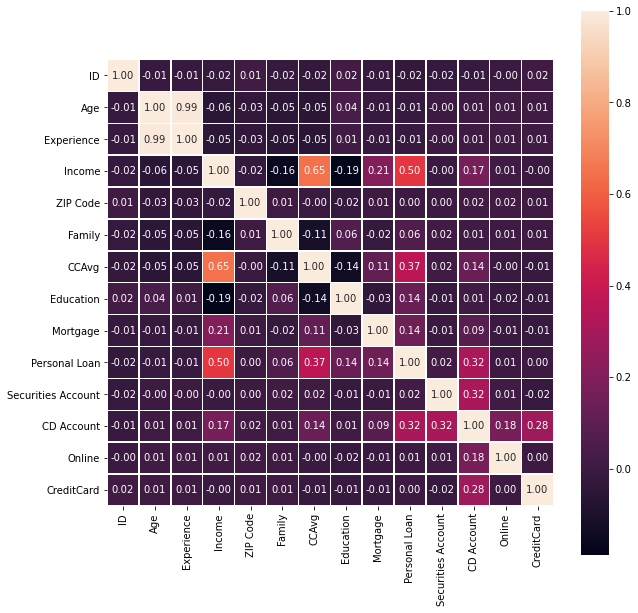

In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv'
df = pd.read_csv(url, sep=';', decimal=',')

# Asiakkaan lainatarjouksen hyväksymispäätöstä on merkitty arvolla 1 
# ja kieltäytymispäätöstä on merkitty arvolla 0.
lainat = df['Personal Loan'].value_counts()
print(lainat)
neg = lainat[0] # kieltäytymispäätökset indeksissä 0
pos = lainat[1] # hyväksymispäätökset indeksissä 1
print('Lainatarjouksen hyväksymispäätöksiä:', pos,'\nLainatarjouksen kieltäytymispäätöksiä:', neg)
print('\n')

print("Viisi muuttujaa, joilla suurimmat lineaariset riippuvuudet muuttujaan 'Personal Loan' verrattuna:")
korrelaatiot = df.corrwith(df['Personal Loan']).sort_values(ascending=False)
print(korrelaatiot[1:6]) # Suurin arvo 'Personal Loan' itse, tulostetaan 5 seuraavaa muuttujaa
print('\n')

korr = df.corr()
print('Korrelaatiokerroinmatriisi:') 
print(korr) # Tutkitaan korrelaatiomatriisia
print('\n')
korr2 = korr[korr < 1] # Täydellistä lineaarista riippuvuutta ei eri muuttujien välillä.
k1 = korr2.abs().unstack()
k1 = k1.sort_values(ascending = False)
k1 = k1.drop_duplicates() # Poistetaan duplikaatit (samojen muuttujaparien kesken).
print('Kolme muuttujaparia, joilla keskinäinen lineaarinen riippuvuus on suurinta:')
print(k1.head(3))
print('\n')

print('Korrelaatiokerroinmatriisi heatmappina:')
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(korr, annot=True, fmt='.2f', square=True, linewidths=.5, ax=ax)
plt.show()



## 4. Logistinen regressio

Selvitä [datasta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv) kaksi muuttujaa joilla on suurimmat lineaariset riippuvuudet muuttujan 'Personal Loan' välillä. Tee kuva, jossa olet esittänyt kahden em. muuttujan välistä riippuvuutta muuttujan 'Personal loan' välillä hajontakuviolla. Tee sitten vielä logistisen regression avulla malli, jossa selittävinä muuttujina ovat vuositulot ('Income') ja luottokorttikulutus ('CCAvg') sekä selitettävänä muuttujana lainapäätös ('Personal Loan'). Mitä voit sanoa logistisen regressiomallin avulla henkilön lainatarjouksen hyväksymisestä seuraavissa tilanteissa:
* Henkilön vuositulot ovat 50 000 \\$ ja luottokorttikulutus on 1000 \\$/kk.
* Henkilön vuositulot ovat 150 000 \\$ ja luottokorttikulutus on 4000 \\$/kk.

Voit antaa vastauksesi hyvin dokumentoidun koodin muodossa.

Kaksi muuttujaa, joilla suurimmat lineaariset riippuvuudet muuttujaan 'Personal Loan' verrattuna:
Income   0.5025
CCAvg    0.3669
dtype: float64




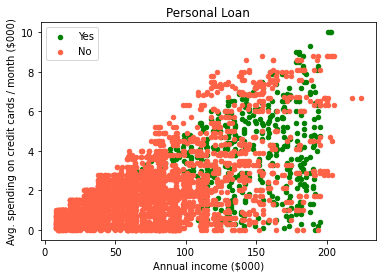

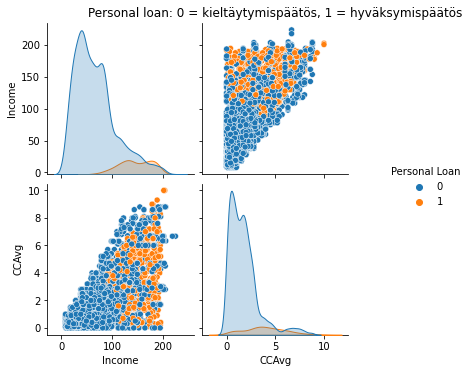



Predict antaa todennäköisyydeksi nollan (kieltäytymispäätöksen) molemmissa tapauksissa.
Vuositulot 50 000 $ ja luottokorttikulutus 1000 $/kk:  [0]
Vuositulot 150 000 $ ja luottokorttikulutus 4000 $/kk:  [0]


Predict_proballa tarkemmat todennäköisyydet [0/1]: 
Vuositulot 50 000 $ ja luottokorttikulutus 1000 $/kk:  [[0.98636279 0.01363721]]
Vuositulot 150 000 $ ja luottokorttikulutus 4000 $/kk:  [[0.63538737 0.36461263]]
Ensimmäisessä tapauksessa kieltäytyminen on mallin mukaan hyvin todennäköistä (n. 99 %).
Toisessakin tapauksessa kieltäytyminen on todennäköistä (n. 64 %).


In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

url = 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv'
df = pd.read_csv(url, sep=';', decimal=',')

print("Kaksi muuttujaa, joilla suurimmat lineaariset riippuvuudet muuttujaan 'Personal Loan' verrattuna:")
korrelaatiot = df.corrwith(df['Personal Loan']).sort_values(ascending=False)
print(korrelaatiot[1:3]) # Suurin arvo 'Personal Loan' itse, tulostetaan 2 seuraavaa muuttujaa
print('\n')

hyvaksytyt = df[df['Personal Loan']==1]
hylatyt = df[df['Personal Loan']==0]
ax1 = hyvaksytyt.plot.scatter('Income', 'CCAvg', color='green', label='Yes')
hylatyt.plot.scatter('Income', 'CCAvg', ax=ax1, color='tomato', label='No')
plt.title('Personal Loan')
plt.xlabel('Annual income ($000)')
plt.ylabel('Avg. spending on credit cards / month ($000)')
plt.show()
print('\n')

# Testimielessä myös pairplot
sns.pairplot(df[['Personal Loan', 'Income', 'CCAvg']], hue='Personal Loan', kind='scatter')
plt.title('Personal loan: 0 = kieltäytymispäätös, 1 = hyväksymispäätös')
plt.show()

x = df[['Income', 'CCAvg']]
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = df['Personal Loan']
malli = LogisticRegression()
malli.fit(x, y)

print('\n')
print('Predict antaa todennäköisyydeksi nollan (kieltäytymispäätöksen) molemmissa tapauksissa.')
print('Vuositulot 50 000 $ ja luottokorttikulutus 1000 $/kk: ', malli.predict(scaler.transform([[50, 1]])))
print('Vuositulot 150 000 $ ja luottokorttikulutus 4000 $/kk: ', malli.predict(scaler.transform([[150, 4]])))
print('\n')
print('Predict_proballa tarkemmat todennäköisyydet [0/1]: ')
print('Vuositulot 50 000 $ ja luottokorttikulutus 1000 $/kk: ', malli.predict_proba(scaler.transform([[50, 1]])))
print('Vuositulot 150 000 $ ja luottokorttikulutus 4000 $/kk: ', malli.predict_proba(scaler.transform([[150, 4]])))
print('Ensimmäisessä tapauksessa kieltäytyminen on mallin mukaan hyvin todennäköistä (n. 99 %).')
print('Toisessakin tapauksessa kieltäytyminen on todennäköistä (n. 64 %).')

## 5. Lainapäätös

Tee annetun [datan](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv) avulla päätöspuu, joka yrittää selittää asiakkaan päätöstä lainatarjouksesta ('Personal loan'). Asiakkaan lainatarjouksen hyväksymispäätöstä on merkitty arvolla 1 ja kieltäytymispäätöstä on merkitty arvolla 0. Aseta päätöspuun muodostamisessa (DecisionTreeClassifier) puun syvyydeksi (max_depth) arvo 4 ja datasettien (luennoilla: lokerot) jakokriteeriksi **ASM** heuristiikalla suurin informaatiosaanto.

Visualisoi päätöspuu export_graphviz funktion ja [Graphviz työkalua](http://dreampuf.github.io/GraphvizOnline/) hyödyntäen. Ilmoita vastauksessasi koodi, jolla olet tuottanut tehnyt em. päätöspuun ja tuottanut siitä export_graphviz funktiolla .dot muotoisen tiedoston visualisointia varten. 

Liitä myös vastauksesi kommentteihin mitä voit sanoa seuraavien henkilöiden päätöksestä hyväksyä lainatarjous:
* Henkilön vuosittaiset tulot ('Income') ovat 50 000 \\$ ja keskimääräinen luottokorttikulutus kuukaudessa ('CCAvg') on 1 000 \\$.
* Henkilön vuosittaiset tulot ovat 150 000 \$, koulutustaso ('Education') vastaa korkeakoulutasoa ('Advanced/Professional').
* Henkilön vuosittaiset tulot ovat 100 000 \$, koulutustaso ('Education') vastaa peruskoulutustasoa ('Undergrad') ja henkilön perheessä ('Family') on kolme henkilöä.

**Lisätietoa:** Päätöspuun muodostamisessa koko datasettiä jaetaan Attribute Selection Measure (**ASM**) heuristiikan avulla pienempiin datasetteihin, jotka yrittävät selittää selitettävää muuttujaa (**Personal loan**). Selvitä päätöspuun [dokumentaatiota](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) tutkimalla kuinka datasettejä voidaan jakaa osiin, jos tavoitteena on saavuttaa suurin informaatiosaanto (**information gain**).

